# Load Forecasting

Autor: Ricardo Vazquez

Modificado por Jose Angel 2 Feb 2017

# Load Data

### Import necessary dependencies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from datetime import datetime, date, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

### Load Meteo Data 

In [21]:
# Load Meteo Data
meteo = pd.read_json('meteo.json')
meteo.head()

,CloudCoverFraction,DewPoint,Humidity,Pressure,Temperature,WindSpeed
2013-11-01 00:00:00,0.25,2.9,0.8455,1026.6,5.3,2.7
2013-11-01 01:00:00,0.25,2.9,0.8455,1026.6,5.3,2.7
2013-11-01 02:00:00,0.25,2.9,0.8455,1026.6,5.3,2.7
2013-11-01 03:00:00,0.25,2.9,0.8455,1026.6,5.3,2.7
2013-11-01 04:00:00,0.25,2.9,0.8455,1026.6,5.3,2.7


### Load Smart Meter data and find supervisors

In [22]:
cncs = pd.HDFStore('./cncs.h5')
print(cncs)

<class 'pandas.io.pytables.HDFStore'>
File path: ./cncs.h5
/1            wide         (shape->[420,8437,7])
/2            wide         (shape->[37,1])      
/3            wide         (shape->[72,5216,7]) 
/4            wide         (shape->[66,1])      


### Keys for the supervisors

In [1]:
cncs.keys()
index = cncs.keys()
index2 = index
for i in range(0,len(index)):
    a = index[i]
    index2[i] = a[1:len(a)]
index = index2 
print(index)

NameError: name 'cncs' is not defined

### Select Supervisor

In [24]:
cnts = cncs[index[3]].copy()

### Keys Codes for the smartmeters of the supervisor selected

In [25]:
index2 = cnts.keys()
index2

Index([u'1769', u'1814', u'439', u'440', u'441', u'442', u'443', u'444',
       u'445', u'446', u'447', u'448', u'449', u'450', u'451', u'452', u'453',
       u'454', u'455', u'456', u'457', u'458', u'459', u'460', u'461', u'462',
       u'463', u'464', u'465', u'466', u'467', u'468', u'469', u'470', u'471',
       u'472', u'473', u'474', u'475', u'476', u'477', u'478', u'479', u'480',
       u'481', u'482', u'483', u'484', u'485', u'486', u'487', u'488', u'489',
       u'490', u'491', u'492', u'493', u'494', u'495', u'496', u'497', u'498',
       u'499', u'500', u'501', u'502'],
      dtype='object')

### Select smart meter

In [26]:
ts = cnts[index2[4]].copy()
ts.head()

,AE,AI,Bc,R1,R2,R3,R4
Fh,,,,,,,
2013-11-01 00:00:00,0,507,00,5,0,0,91
2013-11-01 01:00:00,0,375,18,49,0,0,41
2013-11-01 02:00:00,0,230,00,16,0,0,105
2013-11-01 03:00:00,0,249,00,45,0,0,48
2013-11-01 04:00:00,0,279,00,56,0,0,23


### Merge measurements and meteo forecasts

In [27]:
ts = ts.join(meteo)
ts

,AE,AI,Bc,R1,R2,R3,R4,CloudCoverFraction,DewPoint,Humidity,Pressure,Temperature,WindSpeed
Fh,,,,,,,,,,,,,
2013-11-01 00:00:00,0,507,00,5,0,0,91,0.25,2.90,0.8455,1026.600,5.30,2.70
2013-11-01 01:00:00,0,375,18,49,0,0,41,0.25,2.90,0.8455,1026.600,5.30,2.70
2013-11-01 02:00:00,0,230,00,16,0,0,105,0.25,2.90,0.8455,1026.600,5.30,2.70
2013-11-01 03:00:00,0,249,00,45,0,0,48,0.25,2.90,0.8455,1026.600,5.30,2.70
2013-11-01 04:00:00,0,279,00,56,0,0,23,0.25,2.90,0.8455,1026.600,5.30,2.70
2013-11-01 05:00:00,0,247,00,23,0,0,79,0.25,2.90,0.8455,1026.600,5.30,2.70
2013-11-01 06:00:00,0,241,00,45,0,0,43,0.25,2.90,0.8455,1026.600,5.30,2.70
2013-11-01 07:00:00,0,257,00,25,0,0,74,0.25,2.90,0.8455,1026.600,5.30,2.70
2013-11-01 08:00:00,0,221,00,37,0,0,51,0.25,2.90,0.8455,1026.600,5.30,2.70


### Drop other columns

In [28]:
ts = ts.loc[:, ['AI', 'Humidity', 'Temperature']]

# Train Model

### Create Feature Vector

The feature vector is made up from lagged active energy, calendar information and meteorological forecasts

In [29]:
def get_train_dataset(ts, train_date, steps=24*7, freq='1H'):# Lagged Active
    
    # Select rows up to the train_date
    target = ts.asfreq(freq).loc[:train_date, :]
    
    for n in np.arange(1,steps+1):
        target['lagged' + str(n)] = target['AI'].shift(n)

    # Time
    target['day'] = pd.Series(target.index.day, target.index)
    target['hour'] = pd.Series(target.index.hour, target.index)
    target['weekday'] = pd.Series(target.index.weekday, target.index)
    target['week'] = pd.Series(target.index.week, target.index)

    # Drop Nans: Train only with complete feature vectors
    target = target.dropna()

    # Split feature vector / target
    train_x = target.drop('AI', axis=1) # Feature vector
    train_y = target.ix[:,'AI'] # Actual measurements

    # Scale vectors: substract mean of every column and normalize to a std=1
    scaler_x = StandardScaler().fit(train_x.values)
    scaler_y = StandardScaler().fit(train_y.values)
    train_X = scaler_x.transform(train_x.copy())
    train_Y = scaler_y.transform(train_y.copy())
    
    return scaler_x, scaler_y, train_X, train_Y

### Select train subset

Use the available measurements up to a certain date to fit a model

In [30]:
train_date = '2014-03-31'
scaler_x, scaler_y, train_X, train_Y = get_train_dataset(ts, train_date, steps=24*7, freq='1H')

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [31]:
clf = linear_model.LinearRegression()
clf.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Load Profiles

In case measurements are missing from the database, the algorithm falls back to load profiles, which are the average values of the train dataset grouped by day of the week and hour of the day.

In [32]:
# Select train dataset
target = ts.asfreq('1H').loc[:train_date, :]

# Group measurements based on calendar information
grouped = target.loc[:, 'AI'].astype(float).groupby([lambda x: x.weekday,lambda x: x.hour])

# Calculate the average values
profile = grouped.mean()

### Test Model

The forecast function outputs the the next forecasted values of active energy. The number of values it returns is set by the variable *horizon*. 

In [33]:
def forecast(test_date, retrain=False, horizon=24, freq='H', lagged_measurement=24*7):

    # Define global variables
    global scaler_x, scaler_y, train_X, train_Y, clf
    
    # Dataframe containing output
    forecasts = pd.DataFrame()
    
    # Range of dates of previous measurements
    drange = pd.date_range(end=test_date, periods=lagged_measurement, freq=freq)
    
    for h in range(horizon):
        f_date = drange[-1] + timedelta(hours=1+h)

        # Get Meteo information
        met = test_filled.loc[f_date, ['Humidity', 'Temperature']].values.squeeze()

        # Get previous measurements
        if h==0:
            lagged_meas = test_filled.loc[drange[0]:drange[-1], 'AI'].values.squeeze()
        else:
            lagged_meas = np.roll(lagged_meas, -1)
            lagged_meas[-1] = forecast
        
        # Append to feature vector meteo and date information
        date_info = np.array([f_date.day, f_date.hour, f_date.weekday(), f_date.week])

        # Create feature vector
        feature_vector = met.copy()
        feature_vector = np.hstack((feature_vector, lagged_meas.squeeze()))
        feature_vector = np.hstack((feature_vector, date_info.squeeze()))

        # Normalize
        feature_vector = scaler_x.transform(feature_vector)

        # If the feature vector contains nans fall back to the load profiles
        if np.isnan(feature_vector).sum():
            forecast = profile[f_date.weekday()][f_date.hour]
        else:
            # Predict
            forecast = clf.predict(feature_vector)

            # Denormalize
            forecast = scaler_y.inverse_transform(forecast).item()

        
        # Forecasts of the next h values
        forecasts.loc[drange[-1] + timedelta(hours=1), 'f_'+str(h)] = forecast

        # If measurement is empty, fill with prediction
        if h==0 and np.isnan(test.loc[f_date, 'AI']):
            test_filled.loc[f_date, 'AI'] = forecasts.loc[f_date, 'f_0']
            
    # Optional: retrain the model using the latest measurements
    if retrain:
        scaler_x, scaler_y, train_X, train_Y = get_train_dataset(ts, f_date, steps=24*7, freq='1H')
        #clf.fit(train_X, train_Y)
            
    return forecasts

In [34]:
test = ts.loc[train_date:, :].copy()
test = test.asfreq('1H')

# Copy of the test database. If a measurement is missing it is filled with a forecast
test_filled = test.copy()

# First date to be forecasted
test_date = datetime(2014, 4, 8, 0, 0, 0)

# Horizon: number of forecasts to produce at each step
horizon = 24

# Empty dataframe that will contain the forecasts
forecasts = pd.DataFrame()

In [35]:
# Simulate the process of forecasting. From a given date it outputs h forecasts for every hour.
for i in range(100):
    test_date = test_date + timedelta(hours=1)
    forecasts = pd.concat([forecasts, forecast(test_date.strftime('%Y-%m-%d %H:%M:%S'), retrain=True, horizon=24, freq='1H', lagged_measurement=24*7)])

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

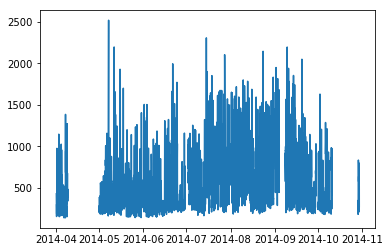

In [36]:
# Plot
plt.plot(test.loc[:, 'AI']) # Actual measurement
plt.plot(forecasts.loc[:, 'f_0']) # Hour ahead forecasts

In [37]:
# Dataframe containing forecasts
forecasts.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23
2014-04-08 02:00:00,296.232684,368.984961,222.426754,286.34275,282.345507,217.274388,289.257247,415.909684,658.876494,762.635642,...,401.024766,445.600478,451.150217,413.955718,455.97134,453.010749,350.706536,392.497358,359.162187,534.035772
